# SVM(Support Vector Machine)
https://en.wikipedia.org/wiki/Support-vector_machine

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_confusion_matrix, classification_report

from sklearn.pipeline import Pipeline, make_pipeline
import scikitplot as skplt
from joblib import dump, load

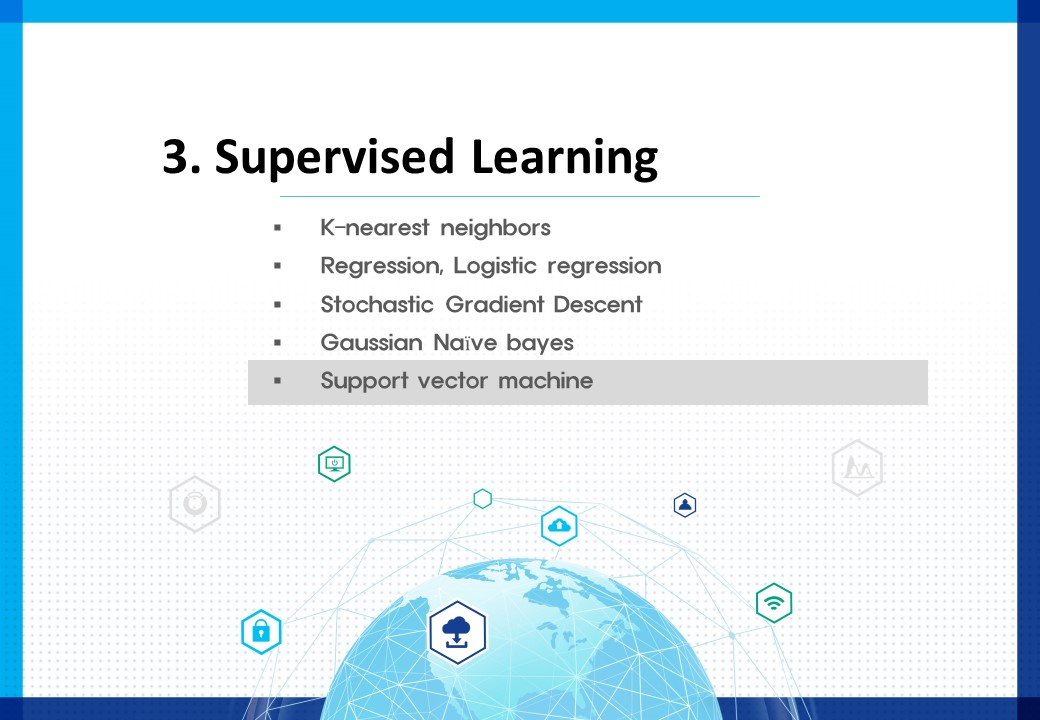

In [3]:
dir_path = r'D:\ASSIST\img'
from IPython.display import Image
width=800; height=500
Image(filename=dir_path +'/슬라이드129.jpg', width=width, height=height)

## Understanding SVM 

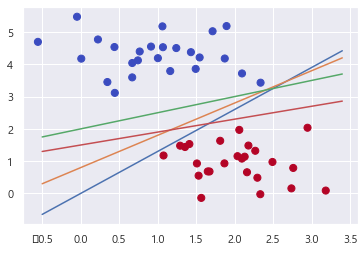

In [16]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm');
X_fit = np.arange(-0.5, 3.5, 0.1)
plt.plot(X_fit, X_fit*1.3); plt.plot(X_fit, 0.8+X_fit*1);
plt.plot(X_fit, 2+X_fit*0.5);plt.plot(X_fit, 1.5+X_fit*0.4)

In [17]:
from sklearn.svm import SVC 
svc = SVC(kernel='linear', random_state=11)
svc.fit(X, y)
svc.support_vectors_  # [(X[:, 0][i].round(4), X[:, 1][i].round(4)) for i in svc.support_]
svc.coef_
svc.intercept_ + svc.support_vectors_@svc.coef_.reshape(2,1)

SVC(kernel='linear', random_state=11)

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

array([[ 0.22967329, -1.37758262]])

array([[-0.99999987],
       [-0.9999994 ],
       [ 0.95048419]])

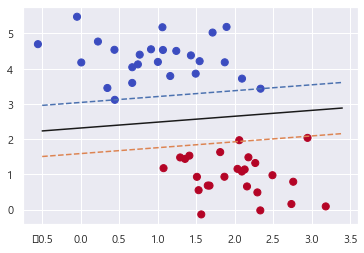

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
center_fence= (-svc.intercept_ - svc.coef_[0][0]*X_fit)/svc.coef_[0][1]
upper_fence= (-1- svc.intercept_ - svc.coef_[0][0]*X_fit)/svc.coef_[0][1]
lower_fence= (1- svc.intercept_ - svc.coef_[0][0]*X_fit)/svc.coef_[0][1]
plt.plot(X_fit,upper_fence,linestyle='dashed'); plt.plot(X_fit, center_fence, 'k'); 
plt.plot(X_fit,lower_fence,linestyle='dashed')

https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

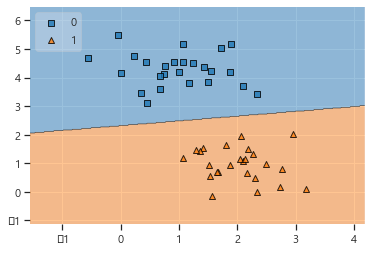

In [40]:
from mlxtend.plotting import plot_decision_regions # 2차원 특성변수의 분류경계선을 시각
fig= plot_decision_regions(X, y, clf=svc, legend=2)

## SVM 알고리즘

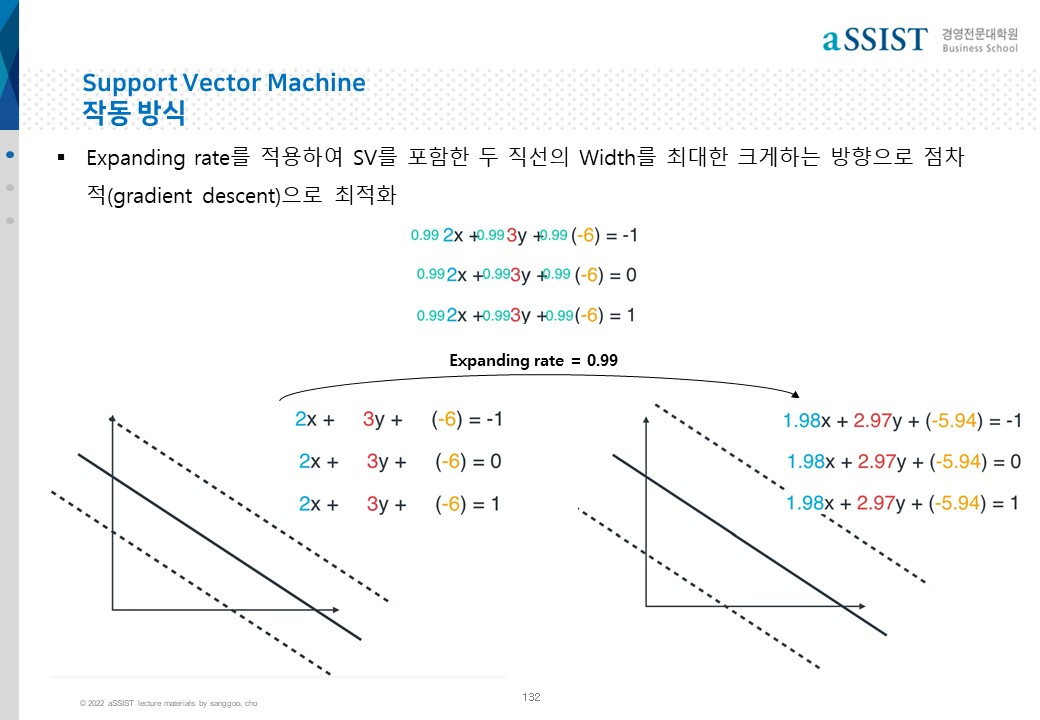

In [41]:
Image(filename=dir_path +'/슬라이드132.jpg', width=width, height=height)

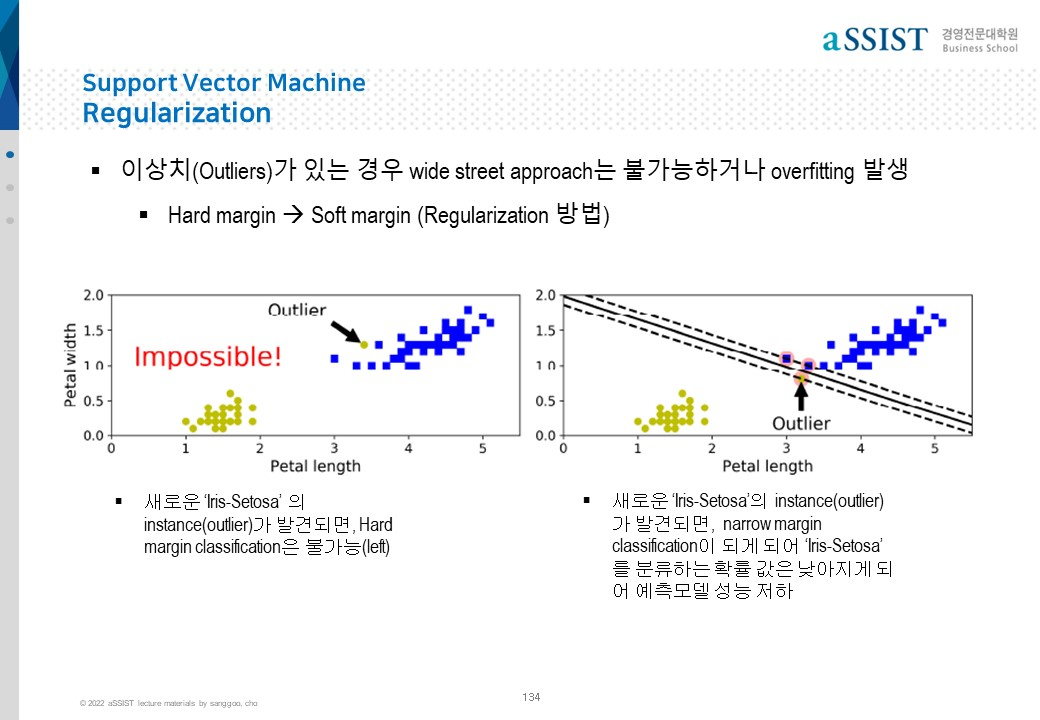

In [42]:
Image(filename=dir_path +'/슬라이드134.jpg', width=width, height=height)

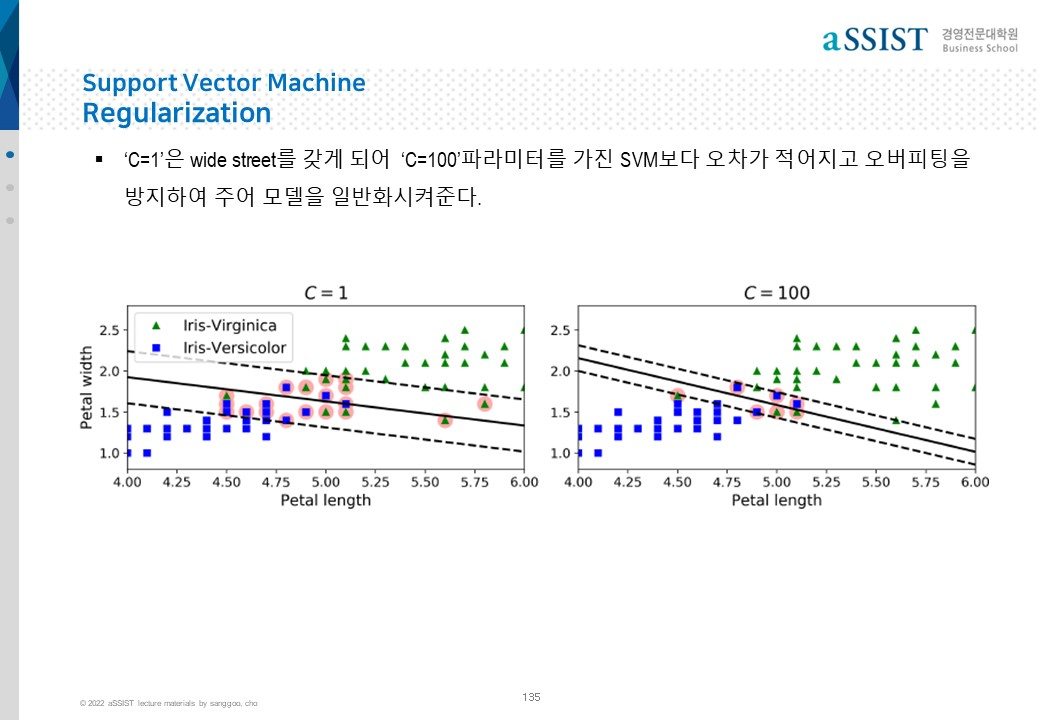

In [43]:
Image(filename=dir_path +'/슬라이드135.jpg', width=width, height=height)

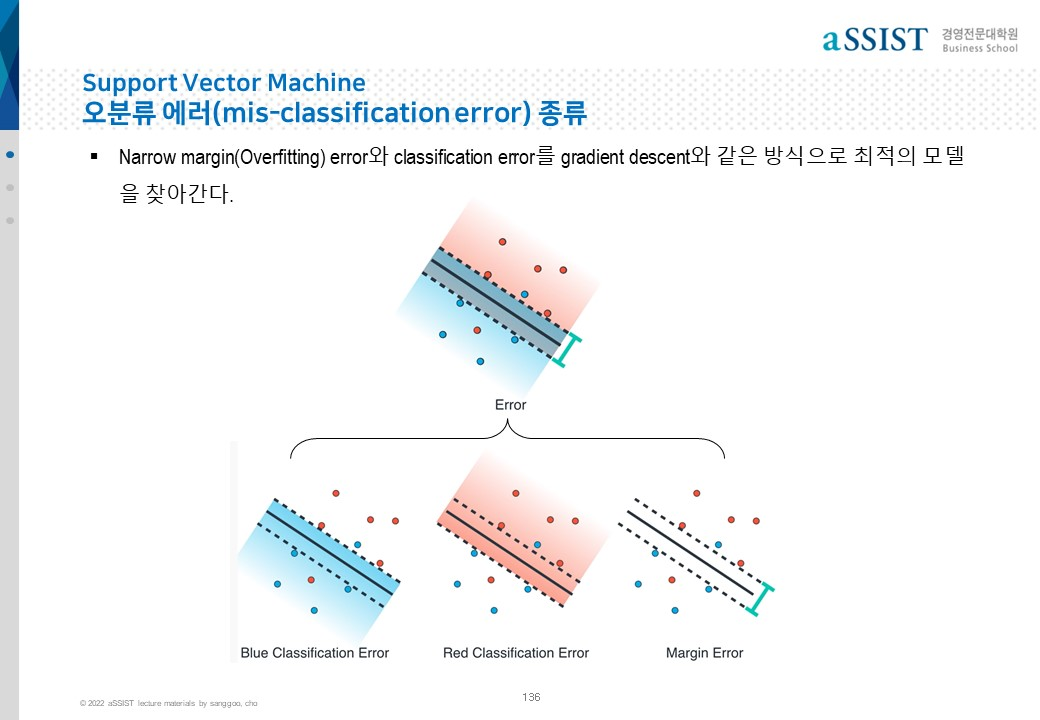

In [44]:
Image(filename=dir_path +'/슬라이드136.jpg', width=width, height=height)

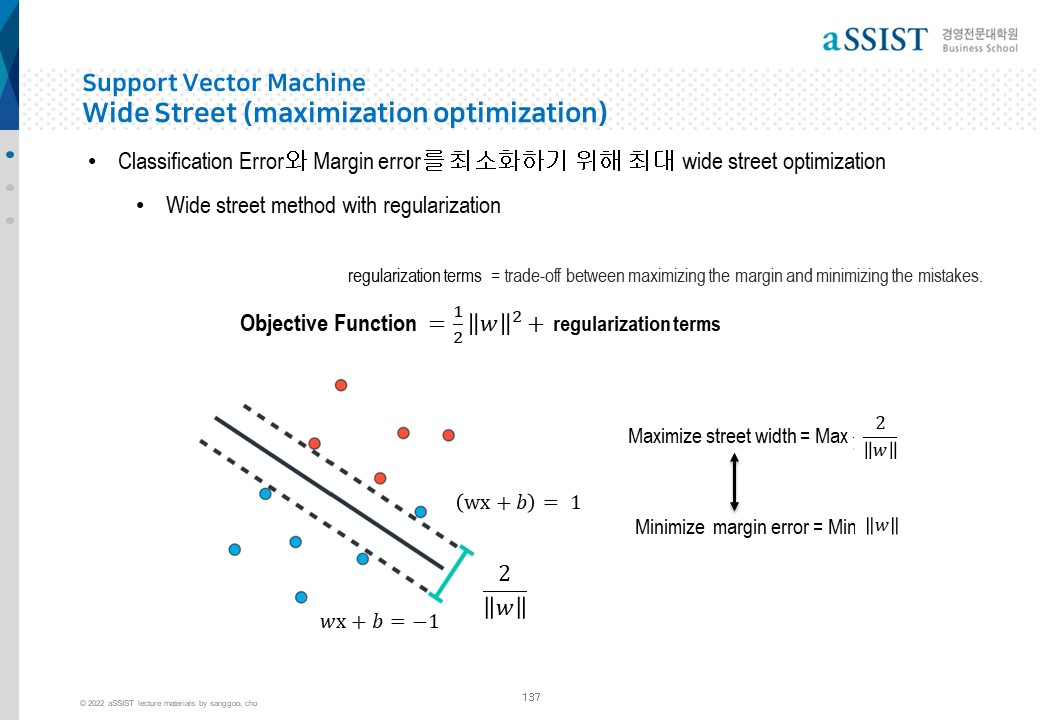

In [45]:
Image(filename=dir_path +'/슬라이드137.jpg', width=width, height=height)

<img src= 'https://wikimedia.org/api/rest_v1/media/math/render/svg/3fbc23e60483b1d9b0ea2b9fc378db02e33e4c50'>

# What is kernel and kernel trick?

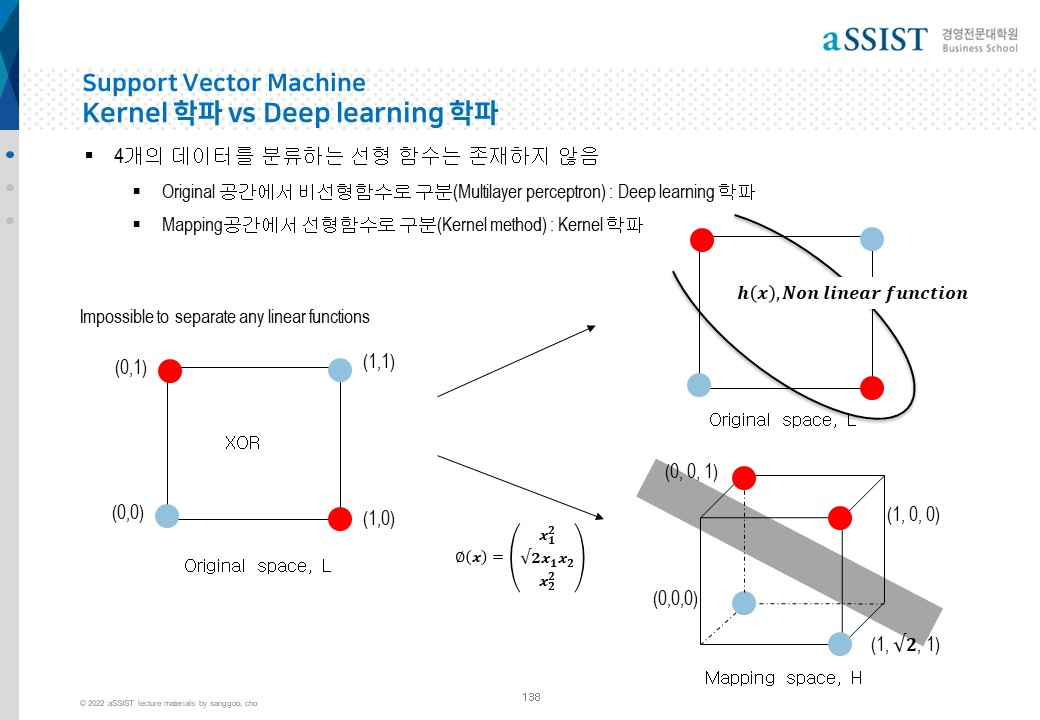

In [46]:
Image(filename=dir_path +'/슬라이드138.jpg', width=width, height=height)

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

Text(0.5, 1.0, 'Problem')

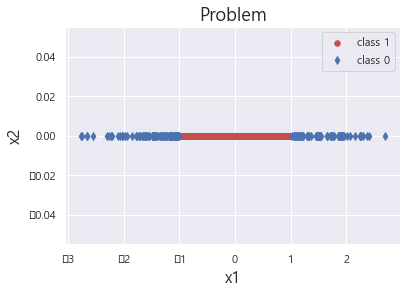

Text(0.5, 0, '$\\phi_1$')

Text(0, 0.5, '$\\phi_2$')

Text(0.5, 1.0, 'Problem solving in Transformed higer Space')

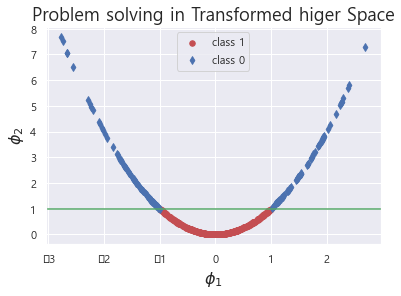

In [47]:
np.random.seed(0)
X = np.random.randn(500); tr = 1
X_pos = X[np.logical_and(X<tr, X>-tr)]; X_neg = X[np.logical_or(X>=tr, X<=-tr)]
plt.scatter(X_pos, y=X_pos*0, c='r', marker='o', label='class 1', s=30)
plt.scatter(X_neg, y=X_neg*0, c='b', marker='d', label='class 0', s=30)
plt.legend(); plt.xlabel('x1', fontsize='16'); plt.ylabel('x2', fontsize='16'); 
plt.title('Problem', fontsize='18');plt.show()

plt.scatter(X_pos, y=X_pos**2, c='r', marker='o', label='class 1', s=30)
plt.scatter(X_neg, y=X_neg**2, c='b', marker='d', label='class 0', s=30)
plt.legend(); plt.xlabel(r'$\phi_1$',fontsize='16'); plt.ylabel(r'$\phi_2$',fontsize='16')
plt.title('Problem solving in Transformed higer Space', fontsize='18')
plt.axhline(y= tr, color='g', linestyle='-')

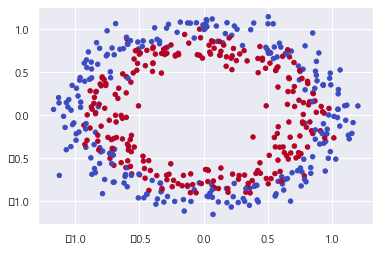

<Figure size 576x576 with 0 Axes>

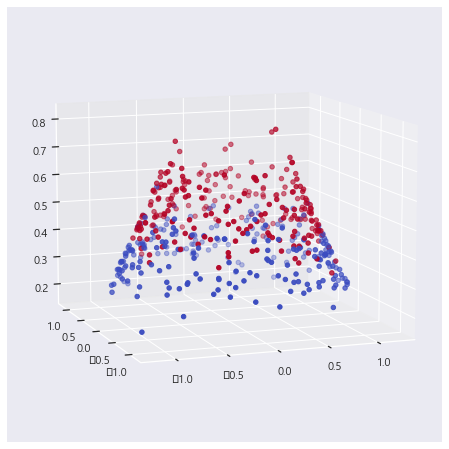

In [48]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, random_state=11, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm');plt.show()

from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, cmap='coolwarm')
ax.view_init(10, 250)

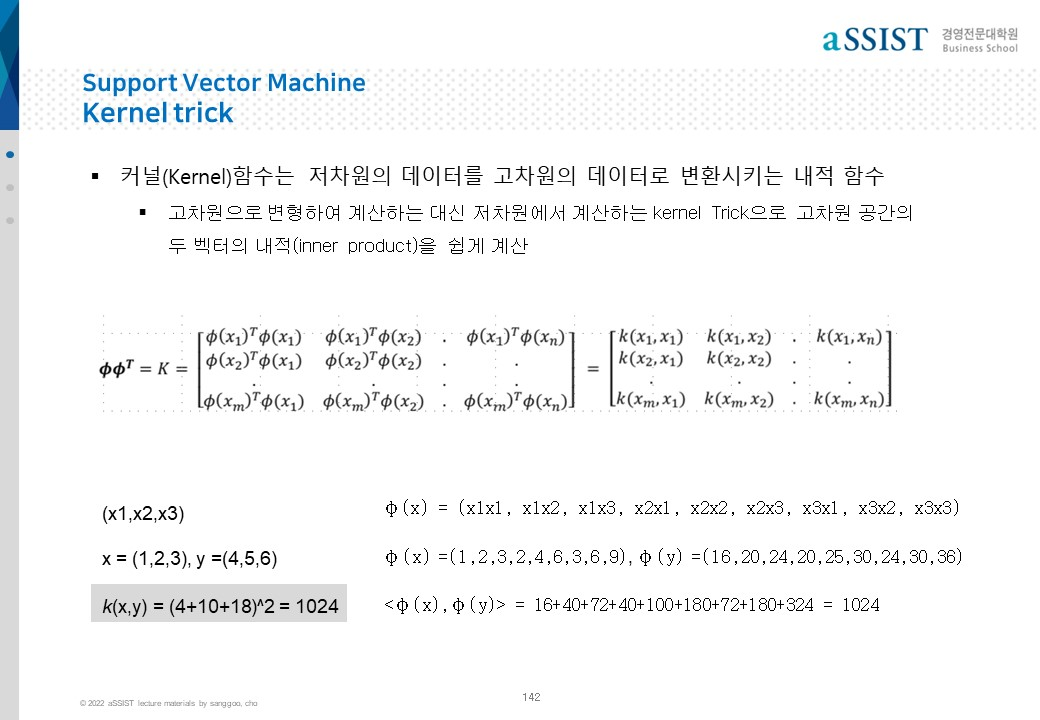

In [49]:
Image(filename=dir_path +'/슬라이드142.jpg', width=width, height=height)

In [50]:
x = np.array([1,2,3]); y = np.array([4,5,6])
x_t = x.reshape(-1,1); x = x.reshape(1,-1)
q_x = x_t@x
q_x

y_t = y.reshape(-1,1); y = y.reshape(1,-1)
q_y = y_t@y
q_y

q_x * q_y
(q_x * q_y).sum()

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

array([[16, 20, 24],
       [20, 25, 30],
       [24, 30, 36]])

array([[ 16,  40,  72],
       [ 40, 100, 180],
       [ 72, 180, 324]])

1024

In [51]:
x = np.array([1,2,3]); y = np.array([4,5,6])
np.dot(x,y)**2 , # kernel function, sum((x*y))**2 

(1024,)

# Kernel density estimation
https://en.wikipedia.org/wiki/Positive-definite_kernel

### 1. 자료를 Gaussian RBF(Kernel)을 사용하여 pdf로 변환 
- Nonlinear SVM classification (Hands-on Macjine learning, O'RRELY Book
#### x1  = 수열 자료(-5 ~ +5)
#### x2, x3 = x1자료에 해당되는 정규분포를 pdf 자료2, 3 생성자료

<AxesSubplot:xlabel='x1'>

Text(0, 0.5, 'Similarity')

Text(0.5, 0, 'x1')

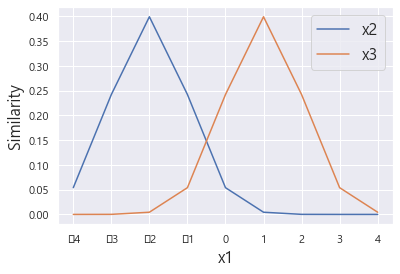

In [52]:
import scipy.stats as stats
x1 = np.arange(-4, 5, 1)
x2 = stats.norm.pdf(x1, -2, 1); x3 = stats.norm.pdf(x1, 1, 1)
data = pd.DataFrame(np.c_[x1, x2, x3], columns = ['x1', 'x2', 'x3'])
data.set_index('x1', inplace=True); data[['x2', 'x3']].plot()
plt.ylabel('Similarity', fontsize = 16); plt.xlabel("x1", fontsize = 16)
plt.legend(fontsize = 16)

Text(0, 0.5, 'x3')

Text(0.5, 0, 'x2')

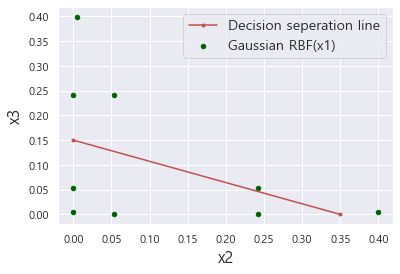

In [53]:
ax1 = data.plot.scatter(x='x2', y='x3', c='DarkGreen', label='Gaussian RBF(x1)')
plt.plot([0,0.35], [0.15,0.00], 'r.-', label='Decision seperation line')
plt.legend(fontsize = 14); plt.ylabel('x3', fontsize = 16); plt.xlabel("x2", fontsize = 16)

### Similarity (Likelihood)
- TN와 TP의 영역에 있는 x1의 RBF변환값은 x2, x3가 둘중 하나는 '0'에 가까움
- FN와 FP의 영역에 있는 x1의 RBF변환값은 x2, x3가 모두 '0' 보다 상당히 크다
- if x1= -1,   x2=0.25, x3=0.05로 좌표 이동, 즉 x1=-1은 x2와 가깝다(similarity가 높다) 

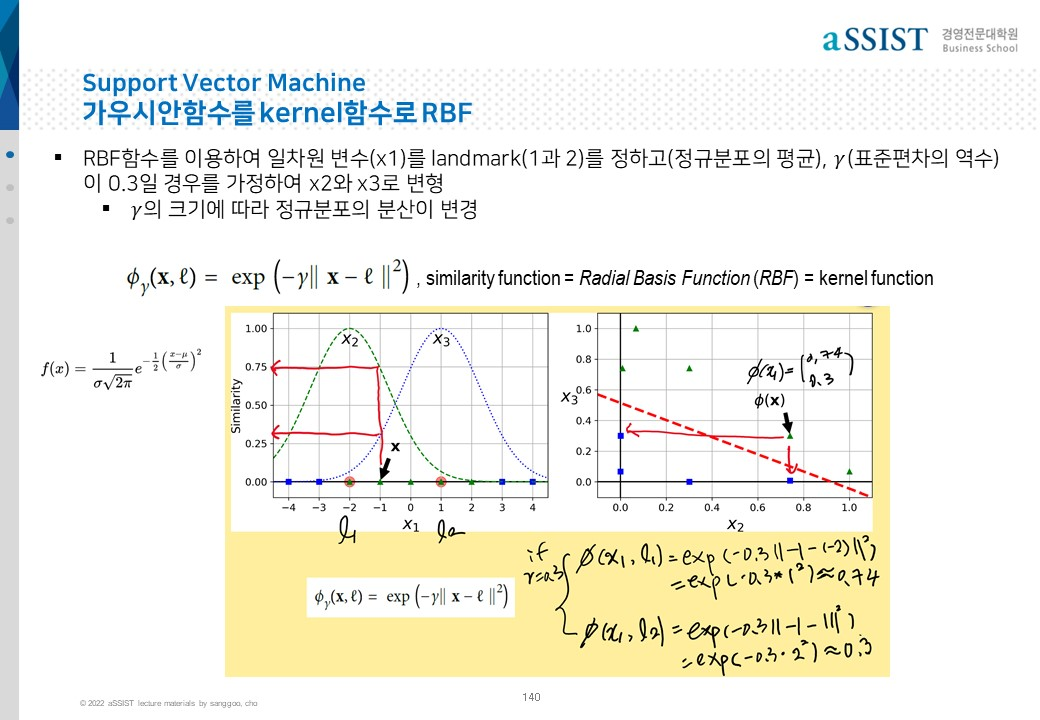

In [54]:
Image(filename=dir_path +'/슬라이드140.jpg', width=width, height=height)

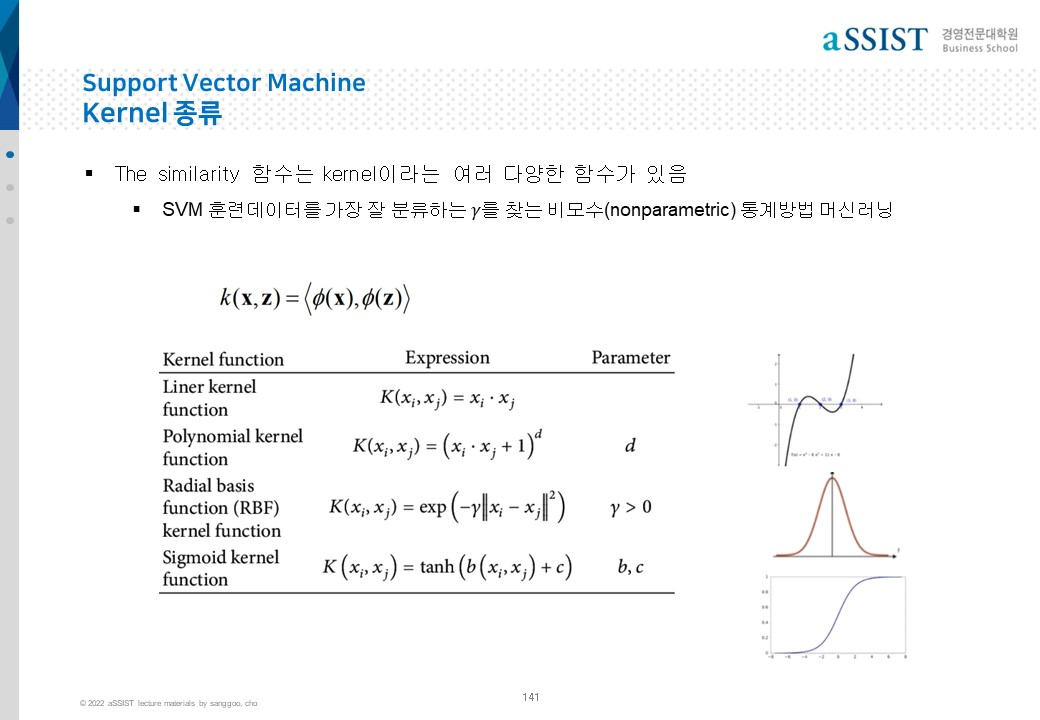

In [55]:
Image(filename=dir_path +'/슬라이드141.jpg', width=width, height=height)

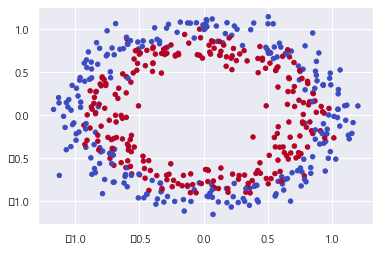

In [56]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, random_state=11, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm')

Text(0.5, 1.0, "SVC(kernel='linear')")

Text(0.5, 1.0, 'SVC()')

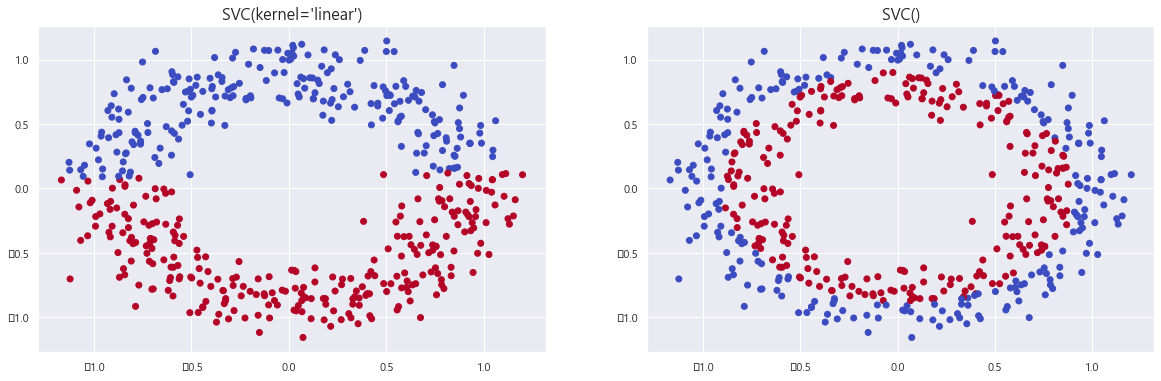

In [57]:
fig, axs = plt.subplots(1,2, figsize=(20, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()
classifiers = [SVC(kernel='linear'), SVC(kernel='rbf')]
for i, classifier in enumerate(classifiers) :
    axs[i].set_title(classifier, fontsize='16')
    y_pred = classifier.fit(X, y).predict(X) 
    axs[i].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm')

## 데이터 읽고 훈련시험 데이터 준비
- 자료는 여기서 다운로드 https://www.kaggle.com/ronitf/heart-disease-uci

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


(303, 14)

0

<AxesSubplot:>

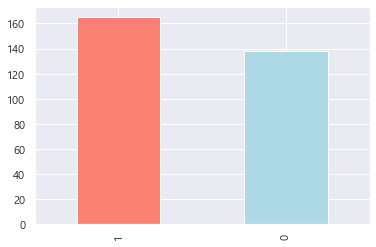

In [4]:
df = pd.read_csv('../data/heart.csv')
df.head()
df.shape
df.isna().sum().sum()
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

(14.5, -0.5)

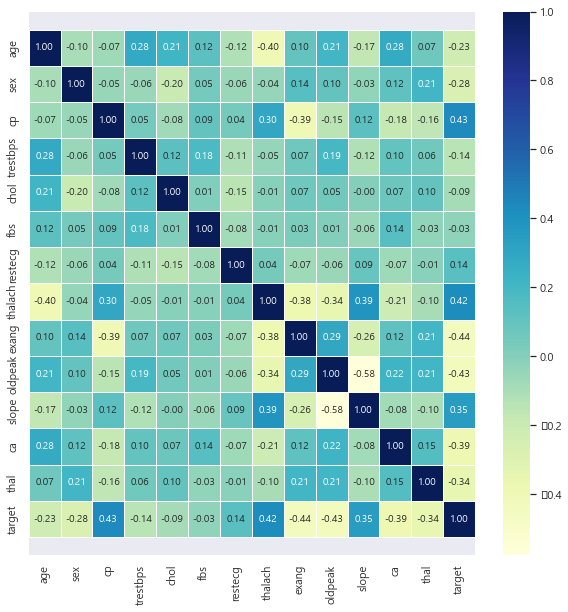

In [5]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5,
                 fmt=".2f", cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

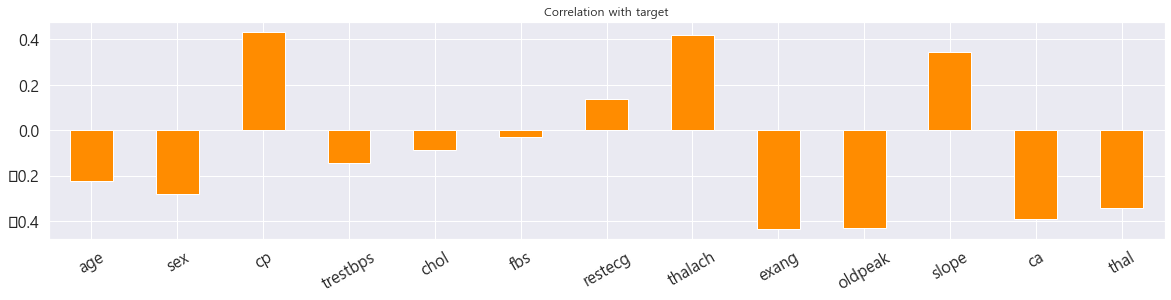

In [6]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 4),  
                                                   color= 'darkorange',
                                                   title="Correlation with target", fontsize=16,
                                                   rot=30)

In [7]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'sex')

<AxesSubplot:>

Text(0.5, 0, 'cp')

<AxesSubplot:>

Text(0.5, 0, 'fbs')

<AxesSubplot:>

Text(0.5, 0, 'restecg')

<AxesSubplot:>

Text(0.5, 0, 'exang')

<AxesSubplot:>

Text(0.5, 0, 'slope')

<AxesSubplot:>

Text(0.5, 0, 'ca')

<AxesSubplot:>

Text(0.5, 0, 'thal')

<AxesSubplot:>

Text(0.5, 0, 'target')

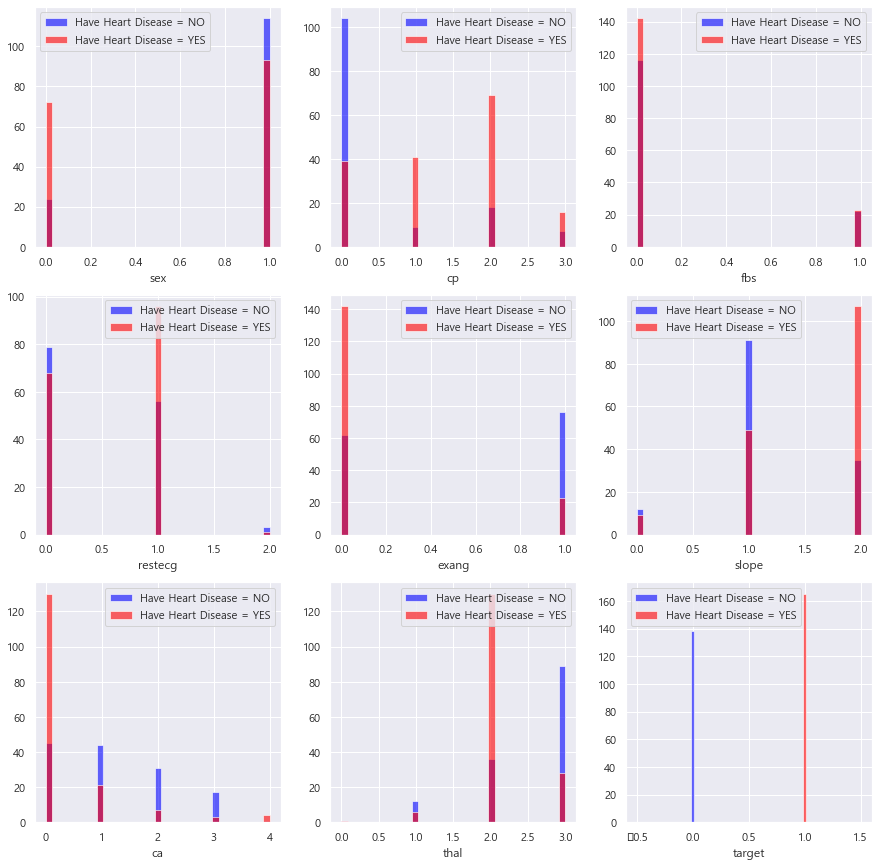

In [8]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    ax = df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    bx = df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'age')

<AxesSubplot:>

Text(0.5, 0, 'trestbps')

<AxesSubplot:>

Text(0.5, 0, 'chol')

<AxesSubplot:>

Text(0.5, 0, 'thalach')

<AxesSubplot:>

Text(0.5, 0, 'oldpeak')

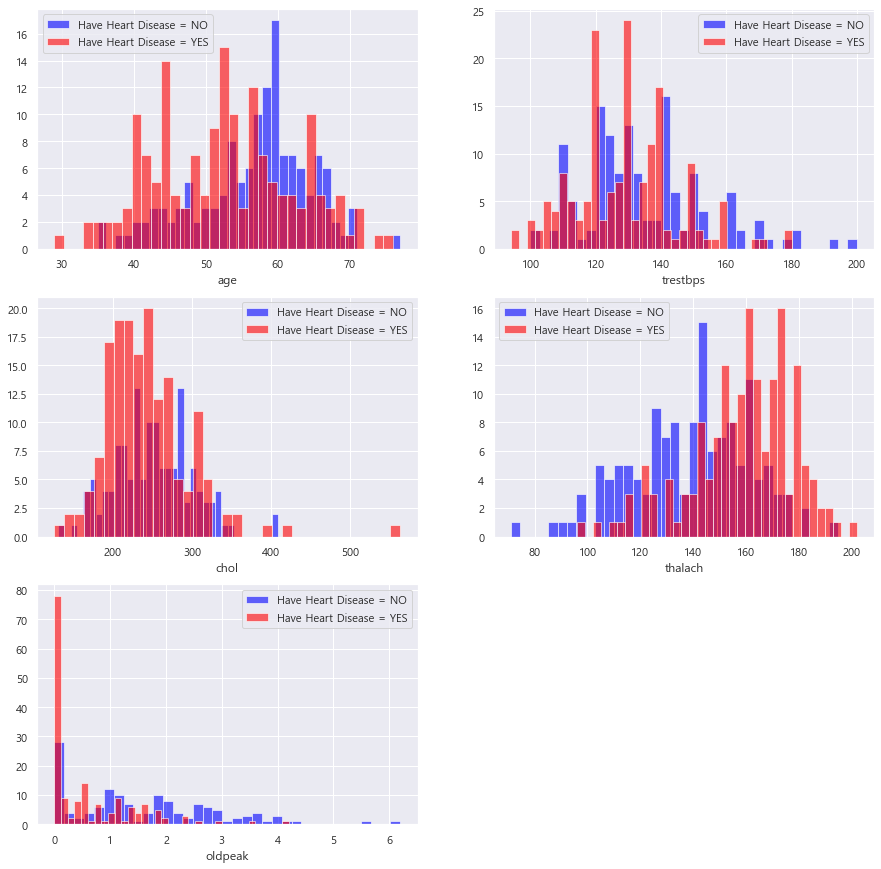

In [9]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    ax = df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    bx= df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [13]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler
s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [14]:
from sklearn.model_selection import train_test_split
X = dataset.drop('target', axis=1)
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
svm_clf = SVC(max_iter=1000)
params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'rbf')} # 'poly', 
svm_cv = RandomizedSearchCV(svm_clf, params, 
                            #n_jobs=-1, 
                            cv=5, 
                            #verbose=1,
                            scoring="accuracy")

In [21]:
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

RandomizedSearchCV(cv=5, estimator=SVC(max_iter=1000),
                   param_distributions={'C': (0.1, 0.5, 1, 2, 5, 10, 20),
                                        'gamma': (0.001, 0.01, 0.1, 0.25, 0.5,
                                                  0.75, 1),
                                        'kernel': ('linear', 'rbf')},
                   scoring='accuracy')

Best params: {'kernel': 'rbf', 'gamma': 0.01, 'C': 20}


In [22]:
print_score(svm_cv, X_train, y_train, X_test, y_test, train=False)
#print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.868421   0.849057  0.857143   0.858739      0.857781
recall      0.804878   0.900000  0.857143   0.852439      0.857143
f1-score    0.835443   0.873786  0.857143   0.854615      0.856511
support    41.000000  50.000000  0.857143  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 5 45]]



In [23]:
model = svm_cv.best_estimator_
#model = svm_cv(**best_params), svm_cv.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_scores = model.decision_function(X_test)
y_predict[0:10]
y_scores[0:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

array([-2.07020907,  0.42316175,  0.42923001, -2.59784288,  1.38581103,
        2.33341035,  0.25947271, -3.39192135, -2.26790084,  0.00771065])

              precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.85      0.90      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



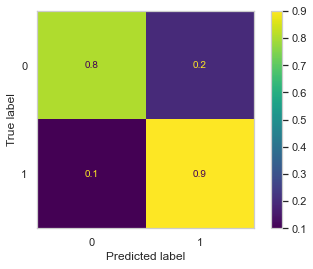

In [24]:
sns.set_style("whitegrid", {'axes.grid' : False})
print(classification_report(y_test, y_predict))
plot_confusion_matrix(model, X_test, y_test, normalize='true')

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
auc = roc_auc_score(y_test, y_scores)
ap = average_precision_score(y_test, y_scores)
print('AUROC :', round(auc * 100, 2)); print('AP Mean :', round(ap * 100, 2))

AUROC : 89.02
AP Mean : 83.42


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.83')

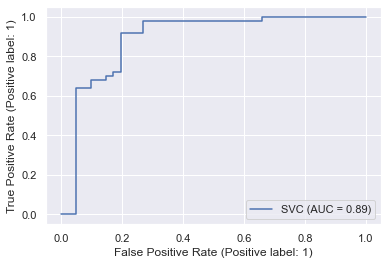

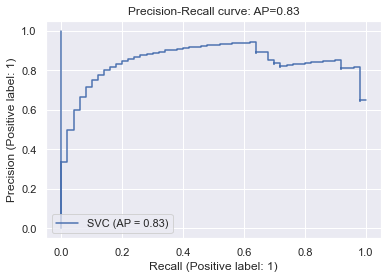

In [26]:
sns.set()
from sklearn.metrics import plot_precision_recall_curve
svc_disp = plot_roc_curve(model, X_test, y_test)
ap = average_precision_score(y_test, y_scores)
svc_disp = plot_precision_recall_curve(model, X_test, y_test)
svc_disp.ax_.set_title('Precision-Recall curve: ' 'AP={0:0.2f}'.format(ap))

In [27]:
import os
os.makedirs('../data', exist_ok=True)
os.makedirs('../output', exist_ok=True)
dump(model, '../output/model.joblib')
clf = load('../output/model.joblib')
clf

['../output/model.joblib']

SVC(C=20, gamma=0.01, max_iter=1000)

## 1. No hyperparameter tuning
### 로지스틱 회귀분석

In [28]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

LogisticRegression(solver='liblinear')

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.879121    0.859504  0.867925    0.869313      0.868480
recall      0.824742    0.904348  0.867925    0.864545      0.867925
f1-score    0.851064    0.881356  0.867925    0.866210      0.867496
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.871795   0.865385  0.868132   0.868590      0.868273
recall      0.829268   0.900000  0.868132   0.864634      0.868132
f1-score    0.850000   0.882353  0.868132   0.866176      0.867776
support    41.000000  50.000000  0.868132  91.000000     91.000000
_____________

In [29]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,86.813187


## 서포트벡터머신

In [30]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

SVC(gamma=0.1)

Train Result:
Accuracy Score: 93.40%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.936842    0.931624  0.933962    0.934233      0.934011
recall      0.917526    0.947826  0.933962    0.932676      0.933962
f1-score    0.927083    0.939655  0.933962    0.933369      0.933903
support    97.000000  115.000000  0.933962  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 89   8]
 [  6 109]]

Test Result:
Accuracy Score: 87.91%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.857143   0.897959  0.879121   0.877551      0.879569
recall      0.878049   0.880000  0.879121   0.879024      0.879121
f1-score    0.867470   0.888889  0.879121   0.878179      0.879239
support    41.000000  50.000000  0.879121  91.000000     91.000000
_____________

In [31]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]],
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,86.813187
1,Support Vector Machine,93.396226,87.912088


## 2. Hyperparameter tuning
### 로지스틱 회귀분석

In [33]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", 
                     #n_jobs=-1, 
                     verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

Best parameters: {'C': 0.23357214690901212, 'solver': 'liblinear'}


LogisticRegression(C=0.23357214690901212, solver='liblinear')

Train Result:
Accuracy Score: 85.85%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.860215    0.857143  0.858491    0.858679      0.858549
recall      0.824742    0.886957  0.858491    0.855849      0.858491
f1-score    0.842105    0.871795  0.858491    0.856950      0.858210
support    97.000000  115.000000  0.858491  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 13 102]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.850000   0.862745  0.857143   0.856373      0.857003
recall      0.829268   0.880000  0.857143   0.854634      0.857143
f1-score    0.839506   0.871287  0.857143   0.855397      0.856968
support    41.000000  50.000000  0.857143  91.000000     91.000000
_____________

In [34]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = results_df.append(tuning_results_df, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,86.813187
1,Support Vector Machine,93.396226,87.912088
2,Tuned Logistic Regression,85.849057,85.714286


## 서포트벡터머신

In [36]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, 
                      #n_jobs=-1, 
                      cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


GridSearchCV(cv=5, estimator=SVC(gamma=0.1),
             param_grid={'C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1),
                         'kernel': ('linear', 'poly', 'rbf')},
             scoring='accuracy', verbose=1)

Best params: {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}


SVC(C=5, gamma=0.01)

Train Result:
Accuracy Score: 87.74%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.881720    0.873950  0.877358    0.877835      0.877505
recall      0.845361    0.904348  0.877358    0.874854      0.877358
f1-score    0.863158    0.888889  0.877358    0.876023      0.877116
support    97.000000  115.000000  0.877358  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 11 104]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.846154   0.846154  0.846154   0.846154      0.846154
recall      0.804878   0.880000  0.846154   0.842439      0.846154
f1-score    0.825000   0.862745  0.846154   0.843873      0.845739
support    41.000000  50.000000  0.846154  91.000000     91.000000
_____________

In [37]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,86.813187
1,Support Vector Machine,93.396226,87.912088
2,Tuned Logistic Regression,85.849057,85.714286
3,Tuned Support Vector Machine,87.735849,84.615385


In [38]:
kf = KFold(n_splits=5)
params = {'C': np.arange(0.001, 1000, 10),
          'gamma': np.arange(0.001, 1000, 10),
          'kernel': ['linear', 'rbf']}
svc = SVC(max_iter=1000, random_state=11)
grid=RandomizedSearchCV(svc, params, cv=kf, 
                        scoring='accuracy', verbose=True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=SVC(max_iter=1000, random_state=11),
                   param_distributions={'C': array([1.00000e-03, 1.00010e+01, 2.00010e+01, 3.00010e+01, 4.00010e+01,
       5.00010e+01, 6.00010e+01, 7.00010e+01, 8.00010e+01, 9.00010e+01,
       1.00001e+02, 1.10001e+02, 1.20001e+02, 1.30001e+02, 1.40001e+02,
       1.50001e+02, 1.60001e+...
       7.50001e+02, 7.60001e+02, 7.70001e+02, 7.80001e+02, 7.90001e+02,
       8.00001e+02, 8.10001e+02, 8.20001e+02, 8.30001e+02, 8.40001e+02,
       8.50001e+02, 8.60001e+02, 8.70001e+02, 8.80001e+02, 8.90001e+02,
       9.00001e+02, 9.10001e+02, 9.20001e+02, 9.30001e+02, 9.40001e+02,
       9.50001e+02, 9.60001e+02, 9.70001e+02, 9.80001e+02, 9.90001e+02]),
                                        'kernel': ['linear', 'rbf']},
                   scoring='accuracy', verbose=True)

In [39]:
print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

optimal train score: 0.609
test score: 0.802
optimal parameter: {'kernel': 'linear', 'gamma': 710.001, 'C': 70.001}


In [40]:
test_score = accuracy_score(y_test, grid.predict(X_test)) * 100
train_score = accuracy_score(y_train, grid.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned_RandomgridCV Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,86.813187
1,Support Vector Machine,93.396226,87.912088
2,Tuned Logistic Regression,85.849057,85.714286
3,Tuned Support Vector Machine,87.735849,84.615385
4,Tuned_RandomgridCV Support Vector Machine,76.415094,80.219780


### It seems that the results doesn't improved a lot after hyperparamter tuning. Maybe because the dataset is small.

In [41]:
model = grid.best_estimator_
y_predict = model.predict(X_test)
y_scores = model.decision_function(X_test)
y_predict[0:10]
y_scores[0:10]

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

array([-1.00617484,  0.38220418,  0.31521726, -1.9065191 ,  1.50998193,
        0.85528807, -0.12061009, -3.46386292, -1.75668393,  0.41281324])

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



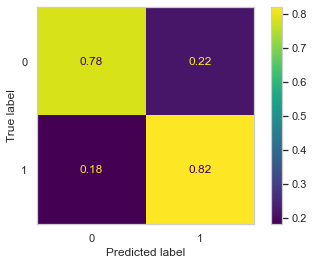

In [42]:
sns.set_style("whitegrid", {'axes.grid' : False})
print(classification_report(y_test, y_predict))
plot_confusion_matrix(model, X_test, y_test, normalize='true')

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
auc = roc_auc_score(y_test, y_scores)
ap = average_precision_score(y_test, y_scores)
print('AUROC :', round(auc * 100, 2)); print('AP Mean :', round(ap * 100, 2))

AUROC : 83.12
AP Mean : 78.38


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.78')

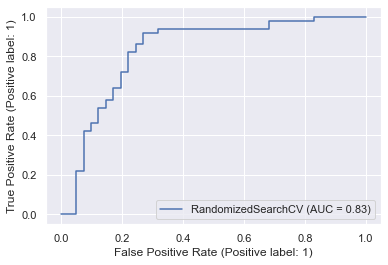

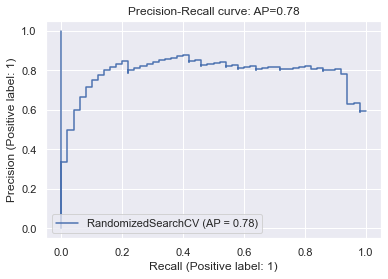

In [44]:
sns.set()
from sklearn.metrics import plot_precision_recall_curve
svc_disp = plot_roc_curve(grid, X_test, y_test)
ap = average_precision_score(y_test, y_scores)
svc_disp = plot_precision_recall_curve(grid, X_test, y_test)
svc_disp.ax_.set_title('Precision-Recall curve: ' 'AP={0:0.2f}'.format(ap))

In [60]:
import os
os.makedirs('../data', exist_ok=True)
os.makedirs('../output', exist_ok=True)

In [61]:
dump(model, '../output/svc.joblib')

['../output/svc.joblib']

# END